# Image Classification MNIST

In [1]:
from sklearn.datasets import fetch_openml #This command imports a library used to load the mnist dataset

In [2]:
import numpy as np  #library that facilitates arrays

In [3]:
mnist = fetch_openml('mnist_784', version= 1, cache = True)  # the data is loaded in the variable using this commdand

In [4]:
mnist.keys() #returns all the keys in the dictionary loaded in the 'mnist' variable above

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
type(mnist)

sklearn.utils.Bunch

In [6]:
#please have a look at the data. Its a dictionary
X,y = mnist['data'], mnist['target']

In [7]:
#The data in 'X' is of the pixel of each image. 1st row represents the first image with 784 columns or pixels
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### The data in 'X' is of the pixel of each image. 1st row represents the first image with 784 columns or pixels

In [8]:
type(y)

pandas.core.series.Series

In [9]:
# The data in Y is the label assocaiated with image. The first row  is 5 which means the the pixels in the 'X' reprensents
# number 5
y


0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [10]:
X.shape
#so there are rows and columns as printed below. Each column repressnts one image. a total of 784 pixels for one single image
#there are 70000 such small images

(70000, 784)

In [11]:
y.shape
#these are labels or numbers marked on each image. (see above) they lie between 0 and 9

(70000,)

In [12]:
#looking at the datasamples
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [13]:
X = X.to_numpy()  #converts the dataframe to numpy array

In [14]:
type(X)

numpy.ndarray

In [15]:
some_digits = X[36000]
some_digits.shape

(784,)

In [16]:
some_digits_image = some_digits.reshape(28,28)


In [17]:
some_digits_image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [18]:
X[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [19]:
X[1].shape

(784,)

###### The above matrix represents a single image. At location 1 of the array we have 784 columns or pixels.  You can notice that there are values ranging from 0 to 255. Its a mixture of values between the range, each value has a specific meaning. For example the value 0 and the value 25 or the value 253 has a meaning which shall understand in a moment. We have converted this set of values into a 28*28 matrix for convenience. Now the image is a 28*28 pixel (length and breadth) below.  

In [20]:
X[1].reshape(28,28)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

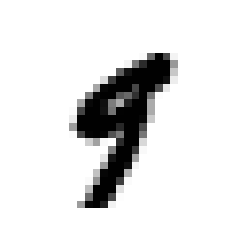

In [21]:
plt.imshow(some_digits_image, cmap= matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')  #This set of command helps us see the what the matrix represetns actually,
plt.show()       #so here, its a 9 in the image of the matrix X[36000] and this is confirmed below.

In [22]:
y[36000]

'9'

CSV (comma-separated values) files are one of the easiest ways to transfer data in form of string especially to any spreadsheet program like Microsoft Excel or Google spreadsheet. In this article, we will see how to save a PYthon dictionary to a CSV file. Follow the below steps for the same.

Import csv module
import csv
Creating list of field names
field_names= ['No', 'Company', 'Car Model']
Creating a list of python dictionaries
cars = [
{‘No’: 1, ‘Company’: ‘Ferrari’, ‘Car Model’: ‘488 GTB’},
{‘No’: 2, ‘Company’: ‘Porsche’, ‘Car Model’: ‘918 Spyder’},
{‘No’: 3, ‘Company’: ‘Bugatti’, ‘Car Model’: ‘La Voiture Noire’},
{‘No’: 4, ‘Company’: ‘Rolls Royce’, ‘Car Model’: ‘Phantom’},
{‘No’: 5, ‘Company’: ‘BMW’, ‘Car Model’: ‘BMW X7’},
]

Writing content of dictionaries to CSV file
with open('Names.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=field_names)
    writer.writeheader()
    writer.writerows(cars)
Syntax:

DictWriter( (filename), fieldnames = [list of field names] )
In the above code snippet writer is an instance of csv.DictWriter class and uses two of its following methods:

DictWriter.writeheader() is used to write a row of column headings / field names to the given CSV file
csvwriter.writerows() method is used to write rows of data into the specified file.

Note: To write a single dictionary in CSV file use writerow() method



In [24]:
test_string = "{'nikhil': 1, 'akshat': 2}"
print('the original string is: ' + test_string)


the original string is: {'nikhil': 1, 'akshat': 2}


In [25]:
import ast

In [26]:
res = ast.literal_eval(test_string)
res

{'nikhil': 1, 'akshat': 2}

In [27]:
type(res) , type(test_string) 

(dict, str)

In [28]:
print(res)

{'nikhil': 1, 'akshat': 2}


In [29]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

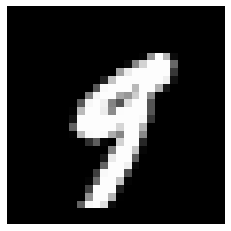

In [30]:
plt.imshow(255-some_digits_image, cmap= matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [31]:
X_train , X_test, y_train,y_test = X[:60000], X[60000:], y[:60000], y[60000:]
#The next step is to split the data into trainig set and test set. We have used the conventional technique of splitting the 
#data though we can use the sckit learn train test split function.

In [32]:
np.random.seed(42) #This command basically retains the particular permutation that is done for the first time.
shuffle_index = np.random.permutation(60000) # If we dont use the seed command, then everytime we randomise the permutation
#we will have a new permutation. 


In [33]:
shuffle_index

array([12628, 37730, 39991, ...,   860, 15795, 56422])

In [34]:
## shuffling array
a = np.array([2,3,6,9,8])
b = np.random.permutation(5)
a= a[b]
a


array([9, 3, 6, 2, 8])

In [35]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

##### Here we have used the 60000  shuffled index at random and feeded it to the training dataset so that the training data is randomly shuffled. Thus the indices of the training data is no more sequential , instead it is randomly and so are the labels in the target y_train


In [36]:
y_train

12628    7
37730    3
39991    8
8525     9
8279     3
        ..
54343    3
38158    8
860      0
15795    0
56422    4
Name: class, Length: 60000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

##### Our tasks here is to perform binaary classification

In [37]:
y_train_9 = y_train=='9'
y_test_9 = y_test=='9'

In [38]:
y_train_9

12628    False
37730    False
39991    False
8525      True
8279     False
         ...  
54343    False
38158    False
860      False
15795    False
56422    False
Name: class, Length: 60000, dtype: bool

In [39]:
from sklearn.linear_model import SGDClassifier

In [40]:
sgd_clf = SGDClassifier(random_state=42, max_iter=10)

In [41]:
sgd_clf.fit(X_train, y_train_9)  #fitting the model

C:\Users\NIYAZ AHMED\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=10, random_state=42)

In [42]:
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [43]:
#predicting the image
sgd_clf.predict([X[8525]])

array([ True])

In [44]:
y_train[8525]

'9'

In [45]:
#predicting the image
sgd_clf.predict([X[12628]])

array([False])

In [46]:
y_train[12628]

'7'

In [47]:
y_train.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: class, dtype: int64

In [48]:
len(a)

5

In [49]:
#predicting the image
sgd_clf.predict([X[6145]])

array([ True])

In [50]:
c =y_train.index

a=[]
for i in c:
    if y_train[i] == '9':
        d = i
        a.append(d)
print(a)

[8525, 51012, 26064, 25224, 19269, 21377, 52203, 3867, 8440, 34482, 48297, 27692, 36474, 48272, 45163, 5874, 50318, 43502, 9998, 49177, 39025, 22799, 21138, 4503, 6100, 21356, 16981, 50746, 44762, 8404, 14504, 47899, 30360, 24478, 30378, 19140, 44001, 30319, 44878, 28889, 26233, 35189, 6821, 38048, 23635, 35080, 59634, 56649, 50528, 51020, 6491, 28058, 42106, 32908, 21757, 54, 44746, 44985, 56996, 13361, 16853, 28215, 44824, 45694, 27237, 51430, 53841, 31767, 38748, 35054, 34458, 30814, 36567, 1736, 3104, 41070, 7416, 4219, 35812, 18131, 30446, 13797, 54546, 37326, 28005, 25652, 5803, 32064, 42851, 59084, 6036, 43751, 19428, 5106, 34104, 35543, 20964, 22390, 58076, 55849, 21072, 22549, 43114, 34439, 28319, 2060, 29953, 10193, 43544, 37553, 32251, 38905, 35786, 50882, 52709, 47125, 41502, 55207, 2331, 54138, 45824, 51239, 8238, 6010, 7478, 32878, 29213, 27191, 10883, 44962, 34476, 17612, 45062, 52743, 18874, 11096, 52576, 7208, 37737, 50544, 11208, 19085, 3099, 41097, 13359, 14493, 1683

In [51]:
len(a)

5949

In [52]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_9, cv =3 , scoring = 'accuracy')

C:\Users\NIYAZ AHMED\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\NIYAZ AHMED\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\NIYAZ AHMED\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.9401 , 0.95175, 0.9485 ])

In [53]:
#predicting the image
sgd_clf.predict([X[36000]])

array([False])

###### As we see that the accuracy turns out to be close to 95%  array([0.9401 , 0.95175, 0.9485 ]) in each of the folds. Can we say that this classifier is performing well? In order to check it, let us build a very dumb classifer and see what is the accuracy of such a classifier

In [54]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
never_5_pred = never_5_clf.predict(X_train)

cross_val_score(never_5_clf, X_train, y_train_9, cv=3, scoring="accuracy")

array([0.90195, 0.9007 , 0.8999 ])

###### And we see that this dumb classifier gives an accuracy of 90%!! So, we need to find some other performance measure to judge classifier.

In [55]:
#create the  predicted image
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv =3)
y_train_pred

C:\Users\NIYAZ AHMED\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\NIYAZ AHMED\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\NIYAZ AHMED\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array(['7', '3', '8', ..., '0', '0', '4'], dtype='<U1')

In [56]:
y_train_pred_9 = cross_val_predict(sgd_clf, X_train, y_train_9, cv =3)
y_train_pred_9

C:\Users\NIYAZ AHMED\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\NIYAZ AHMED\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\NIYAZ AHMED\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([False, False, False, ..., False, False, False])

In [57]:
#confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_9, y_train_pred_9)

array([[52072,  1979],
       [ 1214,  4735]], dtype=int64)

In [58]:
# Total number of 9s, correct preditctions, wrong predictions
print("Total number of 9s =",1214+4735  , '\n'  "correct preditctions =", 4735   , '\n' "wrong predictions =", 1214)

Total number of 9s = 5949 
correct preditctions = 4735 
wrong predictions = 1214


In [59]:
# Precision = TP/(TP+FP)
print('precision :' ,  4735/(4735+1214))

precision : 0.7959320894267944


###### Thus we see that the confusion matrix has altogether exposed the cross_val_score method. Here we see that the accuaracy of the classifier has been reduced from 95% to 80%. Thus the model according the this method is 80% accurate in predicting the sample data.

In [60]:
#confusion Matrix

from sklearn.metrics import confusion_matrix
b =confusion_matrix(y_train, y_train_pred)
b

array([[5765,    2,   16,   16,    7,   21,   33,    9,   48,    6],
       [   1, 6470,   41,   17,    9,   35,   13,   16,  138,    2],
       [  79,   52, 5155,  153,   39,   31,  171,   85,  181,   12],
       [  80,   40,  224, 5087,   19,  286,   62,   78,  217,   38],
       [  37,   30,   46,   15, 5101,   22,   64,   75,  315,  137],
       [ 127,   27,   35,  208,   48, 4451,  175,   35,  259,   56],
       [  45,   10,   57,    3,   19,  112, 5611,   11,   45,    5],
       [  25,   32,   91,   49,   50,   15,    8, 5824,   81,   90],
       [  70,  175,  127,  278,   43,  394,   86,   51, 4571,   56],
       [  48,   33,   54,  117,  326,   99,    5,  801,  834, 3632]],
      dtype=int64)

In [61]:
b.shape

(10, 10)

In [62]:
#recall rate = TP/(TP+FN)
print('recall rate:' , 4735/(4735+1979)*100,"%")

recall rate: 70.52427762883528 %


In [63]:
#claculating precision and recall using method
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_9, y_train_9)

0.7959320894267944

In [64]:
recall_score(y_train_pred_9, y_train_9)

0.7052427762883527

In [65]:
from sklearn.metrics import f1_score
f1_score(y_train_pred_9, y_train_9)

0.7478480612808971

In [66]:
#calculating the decision function of the SGD classifier (see copy)
y_scores = sgd_clf.decision_function([some_digits])
y_scores

array([-108872.68104161])

In [67]:
#calculating the decision function of the SGD classifier (see copy)
y_scores_1 = sgd_clf.decision_function([X[1]])
y_scores_1 

array([-172743.60262384])

In [68]:
#calculating the decision function of the SGD classifier (see copy)
y_scores_2 = sgd_clf.decision_function([X[2]])
y_scores_2

array([-267537.03822024])

In [69]:
#calculating the decision function of the SGD classifier (see copy)
y_scores_3 = sgd_clf.decision_function([X[3]])
y_scores_3

array([-131382.00302051])

In [70]:
#calculating the decision function of the SGD classifier (see copy)
y_scores_4 = sgd_clf.decision_function([X[4]])
y_scores_4

array([8931.32528784])

In [71]:
#deciding the best threshold
y_scores = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3,  #this gives the scores of all the training datasets
method="decision_function")

C:\Users\NIYAZ AHMED\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\NIYAZ AHMED\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\NIYAZ AHMED\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [72]:
y_scores

array([-203391.31979699, -335595.14075415, -224937.15906342, ...,
       -428523.39585224, -604999.69629188, -136127.90359417])

###### These are the scors of each image in the training dataset. i.e. 60000 images

In [73]:
len(y_scores)

60000

In [74]:
#now we shall calculate precision and recall for all possobile threshold
from sklearn.metrics import precision_recall_curve
precision,recall,threshold=precision_recall_curve(y_train_9,y_scores)

In [75]:
precision ,recall , threshold

(array([0.10215506, 0.10213964, 0.1021414 , ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99831905e-01, 9.99831905e-01, ...,
        3.36190956e-04, 1.68095478e-04, 0.00000000e+00]),
 array([-899128.64083765, -899126.68912726, -899121.05320298, ...,
         399229.90868485,  404607.8023953 ,  420369.83671459]))

In [76]:
precision_recall_curve(y_train_9,y_scores)

(array([0.10215506, 0.10213964, 0.1021414 , ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99831905e-01, 9.99831905e-01, ...,
        3.36190956e-04, 1.68095478e-04, 0.00000000e+00]),
 array([-899128.64083765, -899126.68912726, -899121.05320298, ...,
         399229.90868485,  404607.8023953 ,  420369.83671459]))

In [77]:
len(precision) , len(recall), len(threshold)

(58235, 58235, 58234)

In [78]:
precision

array([0.10215506, 0.10213964, 0.1021414 , ..., 1.        , 1.        ,
       1.        ])

In [79]:
recall

array([1.00000000e+00, 9.99831905e-01, 9.99831905e-01, ...,
       3.36190956e-04, 1.68095478e-04, 0.00000000e+00])

In [80]:
recall[1], recall[2], recall[58000]

(0.9998319045217684, 0.9998319045217684, 0.036308623298033284)

In [81]:
precision[1], precision[2] ,precision[58000]

(0.10213964350722946, 0.10214139748939605, 0.9230769230769231)

In [82]:
threshold[1], threshold[2], threshold[58000]

(-899126.6891272601, -899121.053202981, 219444.9216898757)

In [83]:
precision[58234] ,recall[58234] #for values of precision 1 and recall 0 ther's no threshold

(1.0, 0.0)

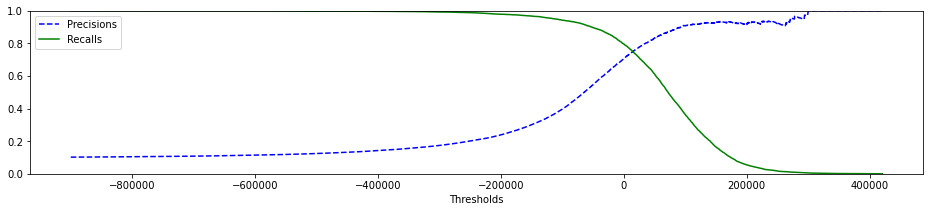

In [84]:
#plotting the data
def precision_recall_vs_threshold_curve(precisions, recalls, thresholds):
    plt.figure(figsize=(16,3))
    #removing the last value to avoid divide by zero
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precisions')
    plt.plot(thresholds, recalls[:-1], 'g-', label= 'Recalls')
    plt.xlabel('Thresholds')
    plt.ylim([0,1])
    plt.legend(loc = 'upper left')
precision_recall_vs_threshold_curve(precision, recall, threshold)
plt.show()

* (1) The curve shows that there exist a trade-off between precision and recall
* (2) As the threshold increases the precsion increases and the recall decreases
* (3) Ideal threshold for this problem is close to zero where the precision and recall is around 70%

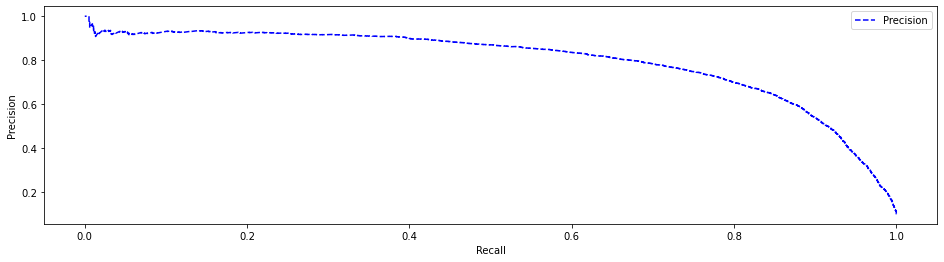

In [85]:
plt.figure(figsize=(16,4))
plt.plot(recall, precision, 'b--', label = 'Precision')
plt.legend(loc ='upper right')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# As recall increases, the precision decreases

In [86]:
#making of the ROC curve (see copy)
from sklearn.metrics import roc_curve
fpr, tpr, threshold_roc = roc_curve(y_train_9, y_scores)

In [87]:
roc_curve(y_train_9, y_scores)

(array([0.        , 0.        , 0.        , ..., 0.96734566, 0.96734566,
        1.        ]),
 array([0.00000000e+00, 1.68095478e-04, 5.21095983e-03, ...,
        9.99831905e-01, 1.00000000e+00, 1.00000000e+00]),
 array([  420370.83671459,   420369.83671459,   299840.98252793, ...,
         -899126.68912726,  -899128.64083765, -1905499.17384662]))

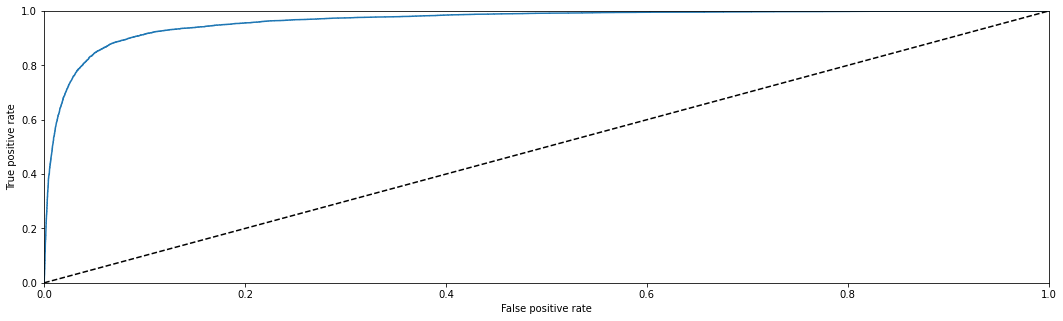

In [88]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(18,5))
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1], 'k--')  #this plots a straight line from 0 to 1 on both axes
    plt.axis([0,1,0,1])  #yaad nai aa rha abhi
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
plot_roc_curve(fpr, tpr)
plt.show()

* We now compare the area under the curve. if the area under the curve is greater than .5, then we say that the classifier
is not purely random classifier. 

In [89]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_9, y_scores)

0.9637386758107422

# Multi classification

In [90]:
sgd_clf.fit(X_train, y_train)

C:\Users\NIYAZ AHMED\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=10, random_state=42)

In [91]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv =3)

C:\Users\NIYAZ AHMED\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\NIYAZ AHMED\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\NIYAZ AHMED\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [92]:
y_train_pred

array(['7', '3', '8', ..., '0', '0', '4'], dtype='<U1')

In [93]:
conf_max =confusion_matrix(y_train, y_train_pred)
conf_max

array([[5765,    2,   16,   16,    7,   21,   33,    9,   48,    6],
       [   1, 6470,   41,   17,    9,   35,   13,   16,  138,    2],
       [  79,   52, 5155,  153,   39,   31,  171,   85,  181,   12],
       [  80,   40,  224, 5087,   19,  286,   62,   78,  217,   38],
       [  37,   30,   46,   15, 5101,   22,   64,   75,  315,  137],
       [ 127,   27,   35,  208,   48, 4451,  175,   35,  259,   56],
       [  45,   10,   57,    3,   19,  112, 5611,   11,   45,    5],
       [  25,   32,   91,   49,   50,   15,    8, 5824,   81,   90],
       [  70,  175,  127,  278,   43,  394,   86,   51, 4571,   56],
       [  48,   33,   54,  117,  326,   99,    5,  801,  834, 3632]],
      dtype=int64)

In [94]:
import pandas as pd
confusion = pd.DataFrame(conf_max)
confusion

,0,1,2,3,4,5,6,7,8,9
0,5765,2,16,16,7,21,33,9,48,6
1,1,6470,41,17,9,35,13,16,138,2
2,79,52,5155,153,39,31,171,85,181,12
3,80,40,224,5087,19,286,62,78,217,38
4,37,30,46,15,5101,22,64,75,315,137
5,127,27,35,208,48,4451,175,35,259,56
6,45,10,57,3,19,112,5611,11,45,5
7,25,32,91,49,50,15,8,5824,81,90
8,70,175,127,278,43,394,86,51,4571,56
9,48,33,54,117,326,99,5,801,834,3632


### 5765- Number of instances actually 0 and correctly predicted as 0
### 48- Number of instances actually 0 and wrongly predicted as 8

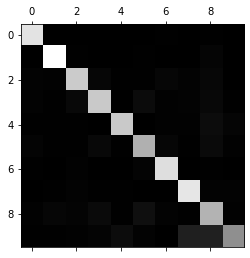

In [95]:
plt.matshow(conf_max, cmap=plt.cm.gray)
plt.show()

* The box at 5 is darker than the other boxes. This could be due to (a) fewer 5s in the dataset or (b) due to bad performance of the clasifier or (c) both

**please see the html file downloaded at this moment to undestand the effect of sscaling the dastaset

In [96]:
#normalizing the color in the box above
row_sums= conf_max.sum(axis =1, keepdims =True)  #addig each row
norm_conf_max = conf_max/row_sums # normalized matrix
norm_conf_max


array([[9.73324329e-01, 3.37666723e-04, 2.70133378e-03, 2.70133378e-03,
        1.18183353e-03, 3.54550059e-03, 5.57150093e-03, 1.51950025e-03,
        8.10400135e-03, 1.01300017e-03],
       [1.48323939e-04, 9.59655888e-01, 6.08128152e-03, 2.52150697e-03,
        1.33491546e-03, 5.19133788e-03, 1.92821121e-03, 2.37318303e-03,
        2.04687036e-02, 2.96647879e-04],
       [1.32594830e-02, 8.72776099e-03, 8.65223229e-01, 2.56797583e-02,
        6.54582075e-03, 5.20308828e-03, 2.87009063e-02, 1.42665324e-02,
        3.03793219e-02, 2.01409869e-03],
       [1.30484423e-02, 6.52422117e-03, 3.65356386e-02, 8.29717827e-01,
        3.09900506e-03, 4.66481814e-02, 1.01125428e-02, 1.27222313e-02,
        3.53938999e-02, 6.19801011e-03],
       [6.33344745e-03, 5.13522766e-03, 7.87401575e-03, 2.56761383e-03,
        8.73159877e-01, 3.76583362e-03, 1.09551523e-02, 1.28380692e-02,
        5.39198904e-02, 2.34508730e-02],
       [2.34274119e-02, 4.98063088e-03, 6.45637336e-03, 3.83693046e-02,
   

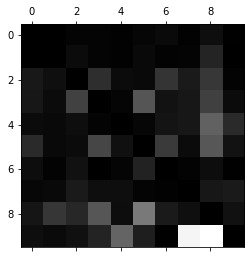

In [97]:
np.fill_diagonal(norm_conf_max, 0)  # this fills the diagonal element of the matrix with 0
plt.matshow(norm_conf_max, cmap = plt.cm.gray)
plt.show()

* We observe that there are some numbers correctly predicted(dark ones) and some are wrongly preidcted(light ones). 
This could be due to the badly writte numbers in the image while most of them are classification error. (see copy)

 # Multi-label Classification

In [98]:

y_train_arr = y_train.to_numpy()     #This piece of code gives two boolean arrays about the numbers present in the y_train_arr
y_train_large = y_train_arr >='7'    #First, it shows the numbers in the array are greater than or equal to 7 or not
y_train_odd =[]                      # Second, it shows whether the numbers in the array are odd or not
for i in y_train_arr:
    if int(i)%2 ==1:
        y_train_odd.append(True)
    else:
        y_train_odd.append(False)

            


* This piece of code gives two boolean arrays about the numbers present in the y_train_arr
    * First, it shows the numbers in the array are greater than or equal to 7 or not
                      * Second, it shows whether the numbers in the array are odd or not


In [99]:

y_train_odd = np.array(y_train_odd) #conveting a list to array

In [100]:
y_train_arr , y_train_large, y_train_odd

(array(['7', '3', '8', ..., '0', '0', '4'], dtype=object),
 array([ True, False,  True, ..., False, False, False]),
 array([ True,  True, False, ..., False, False, False]))

In [101]:
# Meaning of np.c_ - basically stacks column wise
first_arr = np.array([1, 2])
second_arr = np.array([3, 4])
np.c_[first_arr, second_arr]

array([[1, 3],
       [2, 4]])

In [102]:
y_multilabel = np.c_[y_train_large, y_train_odd]
y_multilabel

array([[ True,  True],
       [False,  True],
       [ True, False],
       ...,
       [False, False],
       [False, False],
       [False, False]])

In [103]:
#using the K neighbors classifier for multi-label classificatoin
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()  #initialize
knn_clf.fit(X_train, y_multilabel)  #This trains the data in the true arrays. We will read about the mathematical part of the algorithm later


KNeighborsClassifier()

In [104]:
#predicting the image
knn_clf.predict([X[36000]]), y[36000]

(array([[ True,  True]]), '9')

In [105]:
#predicting the image
knn_clf.predict([X[2546]]), y[2546]

(array([[False, False]]), '4')

In [106]:
#predicting the image
knn_clf.predict([X[50000]]), y[50000]

(array([[False,  True]]), '3')

* So we have noticed that all the predictiosn above have turned out to be correct. Let's cross validate this preditcion
* We first get the predicted value of the image 

In [107]:
X_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [108]:
X_train.shape

(60000, 784)

In [109]:
# Since KNN can take a lot of time, we are trimming the dataset
X_train_sm = X_train[:10000]
y_train_sm = y_train[:10000]

In [132]:
#let us cross validate the performace of the KNN classifer
y_train_knn_pred_1 = cross_val_predict(knn_clf, X_train, y_train, cv = 3)

In [111]:
y_train_knn_pred

array(['7', '3', '8', ..., '0', '0', '4'], dtype=object)

In [112]:
len(y_train_knn_pred)

60000

In [113]:
len(y_multilabel)

60000

In [114]:
f1_score(y_train, y_train_knn_pred, average ='macro')

0.9681383028054587

In [115]:
y_train_knn_pred[2546]

'8'

In [116]:
f1_score(y_train, y_train_knn_pred, average ='weighted')

0.9682379367133435

In [117]:
y_multilabel

array([[ True,  True],
       [False,  True],
       [ True, False],
       ...,
       [False, False],
       [False, False],
       [False, False]])

In [118]:
y_train_knn_pred

array(['7', '3', '8', ..., '0', '0', '4'], dtype=object)

In [119]:
y_train_knn_pred.shape

(60000,)

In [120]:
y_multilabel.shape

(60000, 2)

In [121]:
X_train.shape

(60000, 784)

In [122]:
y_train.shape

(60000,)

In [123]:
#let us cross validate the performace of the KNN classifer
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv = 3)

In [124]:
y_train_knn_pred

array([[ True,  True],
       [False,  True],
       [ True, False],
       ...,
       [False, False],
       [False, False],
       [False, False]])

In [125]:
y_multilabel

array([[ True,  True],
       [False,  True],
       [ True, False],
       ...,
       [False, False],
       [False, False],
       [False, False]])

f1_score(y_multilabel, y_train_knn_pred, average ='macro')

In [126]:
precision_score(y_multilabel, y_train_knn_pred, average ='macro')

0.9755969753751821

In [127]:
recall_score(y_multilabel, y_train_knn_pred, average ='macro')

0.9781393243974865

In [128]:
from sklearn.metrics import multilabel_confusion_matrix

In [129]:
multilabel_confusion_matrix(y_multilabel, y_train_knn_pred)

array([[[41520,   415],
        [  611, 17454]],

       [[28699,   793],
        [  302, 30206]]], dtype=int64)

* Interpretation:- The confusion matrix reveal that out of the total odd numbers(302+30206), 30206 were correctly predicted as odd
    and 302 were falsely predicted as odd. So the recall rate is correct prediction(TP)/ actually correct(TP+FN)
    And the precision score i.e correcred prediction(TP)/ total perceived correct(TP+FP)
    

In [130]:
 print('recall rate = ' , 30206/(30206+793)), print('precesion score = ', 30206/(30206+302) )

recall rate =  0.9744185296299881
precesion score =  0.9901009571259998


(None, None)

* Interpretation:- The confusion matrix also reveals that out of the total large numbers i.e greater than 7-(611+17454), 17454 were
    correctly predicted as large and 611 were falsely  predicted as large.

# Multi-output Classification: Noise Removal

In [134]:
import numpy.random as rnd # this function is used to generate random numbers

In [140]:
rnd.randint(1,20, size=(2,4)) # this generates random numbers ranging from [1,20) for a 2*4 matrix

array([[ 7, 18,  4, 10],
       [ 5,  8, 13, 17]])

In [141]:
# Since KNN take a lot of time, we are trimming it here

X_train = X_train[:30000]
y_train = y_train[:30000]

X_test = X_test[:5000]
y_test = y_test[:5000]

In [142]:
noise_train = rnd.randint(0, 100, size=(len(X_train), 784))
X_train_mod = X_train + noise_train

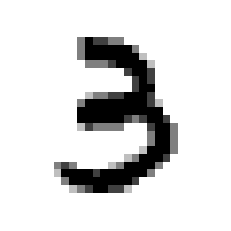

In [161]:
a =X_train[1].reshape(28,28)
b =X_train_mod[1].reshape(28,28)
plt.imshow(a, cmap = matplotlib.cm.binary, interpolation = 'nearest') ,  #image without noise
plt.axis('off')
plt.show()

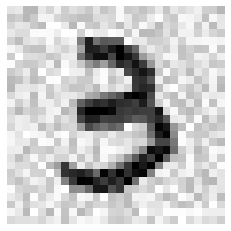

In [164]:
plt.imshow(b, cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')   #image with noise
plt.show()

In [165]:
noise_test = rnd.randint(0,100, size =(len(X_test), 784))
X_test_mod = X_test + noise_test

In [168]:
#setting the clean image as the label
y_train_mod = X_train
y_test_mod = X_test

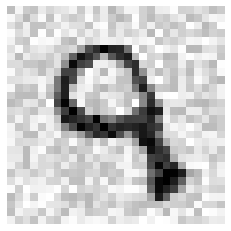

In [169]:
def plot_digit(array):
    array_image = array.reshape(28, 28)
    plt.imshow(array_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()
    
plot_digit(X_test_mod[4000])

In [171]:
#training the data
knn_clf.fit(X_train_mod, y_train_mod)   #X_train is the matrix of the dirty image where as the y_train_mod is the matrix of the 
#clean images. Both have the same dimension.

KNeighborsClassifier()

In [172]:
clean_digit =knn_clf.predict([X_test_mod[4000]])

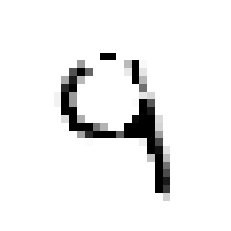

In [173]:
plot_digit(clean_digit)

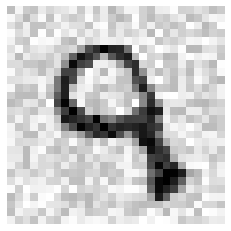

In [174]:
plot_digit(X_test_mod[4000])

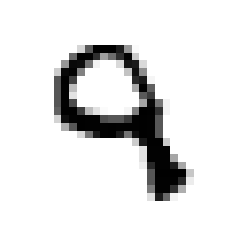

In [175]:
plot_digit(y_test_mod[4000])

In [177]:
clean_digit =knn_clf.predict([X_test_mod[500]])

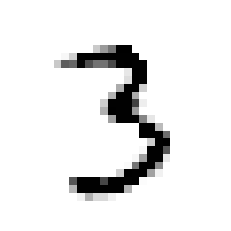

In [178]:
plot_digit(clean_digit)  # after cleaning

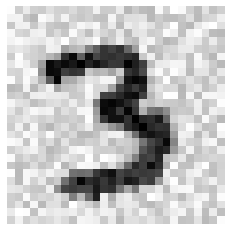

In [179]:
plot_digit(X_test_mod[500])  #dirty image

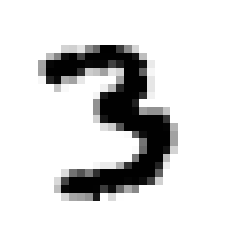

In [180]:
plot_digit(X_test[500])  #original image